In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from gait_analysis import *
from scipy.stats import sem
import os

In [2]:
# run in tardi_gait folder
main_dir = os.getcwd()
os.chdir(os.path.join(main_dir,'analyzed_movies'))

dir_list = listDirectories()
for d in dir_list:
    print(d)

ldopa-1mm-cw
caff-iw-tardi2-211011
caff-control-iw-tardi2-211011
3iy_1mg_cw_6min-iw
iw-211021-t02
tlo_garage_ram
tardy9
echiniscus_KT-t01-211021
ldopa-500um-kt
stumpyleg_drop
ldopa-control-kt
iw-211021-t01
caroline_b01
ldopa-control-cw
H_exemplaris
3iy_control-cw-2min-iw


In [3]:
# choose which folders to compare
dir1 = 'caff-control-iw-tardi2-211011'
dir2 = 'caff-iw-tardi2-211011'

fname = 'all_step_data_swings.csv' # created by the script save_step_data.py

In [4]:
df1 = experimentToDf(dir1,fname)
print('DF size',df1.shape)
df1[df1.ref_leg=='R3'].head(3) 


Choose from this list (separate by commas if multiple choices): 
1: iw-tardi2-nocaff-157-210
2: iw-tardi2-nocaff-230-240
3: iw-tardi2-nocaff-126-136
4: select ALL

Which number(s) do you want? 4

You chose them all

Found iw-tardi2-nocaff-157-210/all_step_data_swings.csv
Found iw-tardi2-nocaff-230-240/all_step_data_swings.csv
Found iw-tardi2-nocaff-126-136/all_step_data_swings.csv
DF size (413, 17)


,ref_leg,down_time,up_time,stance_time,swing_time,gait_cycle,duty_factor,mid_swing,R4_mid_swings,R3_mid_swings,R2_mid_swings,R1_mid_swings,L1_mid_swings,L2_mid_swings,L3_mid_swings,L4_mid_swings,clip
22,R3,0.333,0.767,0.434,0.433,0.867,0.5006,0.9835,R4:0.9043,R3:0.7503,R2:,R1:,L1:1.0,L2:0.7503,L3:0.346,L4:0.5773,iw-tardi2-nocaff-157-210
23,R3,1.200,1.767,0.567,0.267,0.834,0.6799,1.9005,R4:0.5204,R3:0.8399,R2:0.44,R1:0.1607,L1:0.0;0.8801,L2:0.6001,L3:0.1199,L4:0.2404;0.9203,iw-tardi2-nocaff-157-210
24,R3,2.034,2.535,0.501,0.200,0.701,0.7147,2.6350,R4:0.3338,R3:0.8573,R2:0.5235,R1:0.2382,L1:0.8809,L2:0.5235,L3:0.1434,L4:0.6669,iw-tardi2-nocaff-157-210


iw-tardi2-nocaff-230-240
iw-tardi2-nocaff-126-136
iw-tardi2-nocaff-157-210


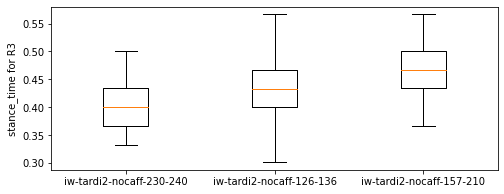

In [36]:
# how consistent is a given parameter between the different clips?
clips = list(set(df1['clip'].values))
parameter = 'stance_time'
leg = 'R3'
data_to_plot = []
for clip in clips:
    print(clip)
    data_for_clip = df1[df1['clip'] == clip]
    data_for_leg = data_for_clip[data_for_clip['ref_leg']==leg]
    data_for_parameter = data_for_leg[parameter].values
    data_to_plot.append(data_for_parameter)
f = plt.figure(figsize = (8,3))
plt.boxplot(data_to_plot)
locs, labels = plt.xticks()
labels = clips
plt.xticks(locs,labels)
plt.ylabel(parameter + ' for ' + leg)
plt.show()

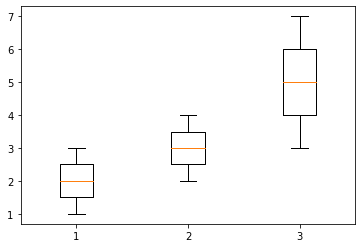

In [15]:
t = [[1,2,3],[2,3,4],[3,4,5,6,7]]
plt.boxplot(t)
plt.show()

In [ ]:
# run in tardi_gait folder
main_dir = os.getcwd()
os.chdir(os.path.join(main_dir,'analyzed_movies'))

dir_list = listDirectories()
for d in dir_list:
    print(d)

In [ ]:
# select experiment to analyze
experiment_dir = 'caff-iw-tardi2-211011'
os.chdir(os.path.join(main_dir,'analyzed_movies',experiment_dir))

In [ ]:
# get list of directories in working folder
dirs = listDirectories()

# select directories that contain data to analyze
data_folders = selectFromList(dirs)

In [ ]:
# for each directory, parse data in mov_data.txt
# add add this data to leg_dict
folder = data_folders[0]

mov_data = os.path.join(folder, 'mov_data.txt')

In [ ]:
leg_dict = makeLegDict()
up_down_times, movieLength = getUpDownTimes(mov_data)
leg_dict = addDataToLegDict(leg_dict,up_down_times)

In [ ]:
boxdata = []
legs = ['L4','L3','L2','L1','R1','R2','R3','R4']
for leg in legs:
    d = 'duty_factors'
    boxdata.append(leg_dict[leg][d])
plt.ylabel(d)
plt.boxplot(boxdata)
plt.show()

In [ ]:
# quality control for up_down_times ... make sure they are alternating!
def qcUpDownTimes(up_down_times):
    for leg in up_down_times.keys():
        downs = up_down_times[leg]['d']
        ups = up_down_times[leg]['u']
        combo_times = np.array(downs + ups)
        down_array = ['d'] * len(downs)
        up_array = ['u'] * len(ups)
        combo_ud = np.array(down_array + up_array)
        inds = combo_times.argsort()
        sorted_ud = combo_ud[inds]
        for i in range(len(sorted_ud[:-1])):
            if sorted_ud[i] == sorted_ud[i+1]:
                print('alternating u/d problem for ' + leg)

In [ ]:
qcUpDownTimes(up_down_times)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
def getDataFromFile(fname):
    legDict = {}
    with open(fname, 'r') as f:
        for line in f:
            if line.startswith('Length'):
                movieLength = float(line.rstrip().split()[1])
            if line.startswith('Data'):
                currentLeg = line.rstrip().split()[2]
                legDict[currentLeg] = {}
            if line.startswith('Foot Down'):
                line = line.rstrip()
                footdown = parseFootLine(line)
                legDict[currentLeg]['d'] = footdown
            if line.startswith('Foot Up'):
                line = line.rstrip()
                footup = parseFootLine(line)
                legDict[currentLeg]['u'] = footup
    return legDict, movieLength

def parseFootLine(footline):
    return [int(x) / 1000 for x in footline.split(': ')[1].split()]

In [ ]:
fname = 'test_crawl/mov_data.txt'
# fname = 'iw-tardi2-nocaff-230-240/mov_data.txt'
# legDict_230_240, movieLength = getDataFromFile(fname)
# fname = 'iw-tardi2-nocaff-157-210//mov_data.txt'
# legDict_157_210, movieLength = getDataFromFile(fname)

In [ ]:
# get durations of stances and swings for a leg
# inputs = lists of times of foot-down (d) and foot-up (u)
# can get these lists from leg_dictionary, out of getDataFromFile
def getStancesSwings(d,u):
    stances = []
    swings = []

    # get stance durations
    if d[-1] > u[-1]:
        # last down is greater than last up
        # so ... going to ignore last down
        downs = d[:-1]
    else:
        downs = d   

    for step in downs:
        upstep = u[np.argmax(u>step)]
        # print(step,upstep)
        duration = upstep - step
        stances.append(duration)

    # get swing durations
    if u[-1] > d[-1]:
        # last up is greater than last down
        # so ... going to ignore last up
        ups = u[:-1]
    else:
        ups = u

    for step in ups:
        downstep = d[np.argmax(d>step)]
        # print(step,downstep)
        duration = downstep - step
        swings.append(duration)    

    stances = np.array(stances)
    swings = np.array(swings)

    return stances, swings

# given 2 legs ... get intervals between the down-steps of those legs
# input = lists of times of down-steps
def getStepIntervals(leg_down_1, leg_down_2):
    intervals = []

    if leg_down_1[-1] > leg_down_2[-1]:
        # last step of leg 1 is after leg 2 ... so we will ignore it
        leg_down_1 = leg_down_1[:-1]

    for step in leg_down_1:
        next_step = leg_down_2[np.argmax(leg_down_2>step)]
        # print(step,upstep)
        duration = next_step - step
        intervals.append(duration)

    return intervals

In [ ]:
leg = 'R2'
d = np.array(legDict[leg]['d'])
u = np.array(legDict[leg]['u'])
print(d)

In [ ]:
# boxplot of stance or swing data
def plot_stance(leg_dict,leg_list,to_plot = 'stance'):
    plt.style.use('fivethirtyeight')
    box_data = []
    
    for leg in leg_list:
        stances_leg, swings_leg =  getStancesSwings( np.array(leg_dict[leg]['d']), np.array(leg_dict[leg]['u']) )
        if to_plot == 'swing':
            box_data.append(swings_leg)
            ylab = 'Swing Time (sec)'
        else:
            box_data.append(stances_leg)
            ylab = 'Stance Time (sec)'
            
    f,a = plt.subplots(1, figsize=(4,4), facecolor='w')
    a.boxplot(box_data)
    a.set_xticklabels(leg_list)
    a.set_ylabel(ylab)
    a.set_xlabel('legs')
    a.set_facecolor('w')
    plt.show()
    
    return box_data

In [ ]:
# testing boxplots
#plot_stance(legDict,['L4','L3','L2','L1'],'stance')
#plot_stance(legDict,['R4','R3','R2','R1'],'stance')

plot_stance(legDict_230_240,['R4','R3','R2','R1'],'swing')
#plot_stance(legDict_230_240,['L4','L3','L2','L1'],'swing')

In [ ]:
plot_stance(legDict_157_210,['R4','R3','R2','R1'],'swing')
#plot_stance(legDict_157_210,['L4','L3','L2','L1'],'swing')

In [ ]:
# just testing - order all leg steps based on step times
# first, want to sort one list based on order of another
# for example 

R1 = [22,35,67]
R2 = [11,33,64]
R3 = [10,32,63]
R4 = [9, 31, 56]
L1 = [12, 34, 27]

legs_R1 = ['R1'] * len(R1)
legs_R2 = ['R2'] * len(R2)
legs_R3 = ['R3'] * len(R3)
legs_R4 = ['R4'] * len(R4)
legs_L1 = ['L1'] * len(R4)

stepTimes = R1 + R2 + R3 + R4 + L1
legs = legs_R1 + legs_R2 + legs_R3 + legs_R4 + legs_L1
print(stepTimes)
print(legs)

In [ ]:
# get list of leg steps in order, based on concatenated lists of legs and step times
# e.g. legs = ['R1','R1','R1','R2','R2','R2']
# stepTimes = [1, 4, 9, 2, 5, 11]
# returns ['R1','R2','R1','R2','R1','R2']
def sort_leg_times(legs, stepTimes): 
    zipped_pairs = zip(stepTimes, legs)
    leg_order = [x for _, x in sorted(zipped_pairs)]
    return leg_order

# given a list of leg order, like this
# ['R1', 'R1', 'R1', 'R2', 'R4', 'R4', 'R4', 'L1', 'L1', 'L1']
# make dictionary of what leg comes next most often
# turns out to be not so useful?
def whatIsNextLeg(leg_order):
    unique_legs = sorted(list(set(leg_order)))

    next_step_dict = {}

    for leg in unique_legs:
        # what are indices of this leg in leg_order?
        indices = [i for i, x in enumerate(leg_order) if x == leg]

        if indices[-1] + 2 > len(leg_order):
            indices = indices[:-1]

        next_steps = [leg_order[i+1] for i in indices]

        unique_next_steps = sorted(list(set(next_steps)))

        d = dict(Counter(next_steps))
        next_step_list = sorted(d.items(), key=lambda x:x[1], reverse=True)
        print(leg, next_step_list)
        next_step_dict[leg] = next_step_list[0][0]
        print()
    return next_step_dict

In [ ]:
leg_order = sort_leg_times(legs, stepTimes)
print(leg_order)

In [ ]:
next_step_dict = whatIsNextLeg(leg_order)

for leg in sorted(next_step_dict.keys()):
    print(leg,next_step_dict[leg])

In [ ]:
# try with real data
L1 = np.array(legDict['L1']['d'])
legs_L1 = ['L1'] * len(L1)
R1 = np.array(legDict['R1']['d'])
legs_R1 = ['R1'] * len(R1)

L2 = np.array(legDict['L2']['d'])
legs_L2 = ['L2'] * len(L2)
R2 = np.array(legDict['R2']['d'])
legs_R2 = ['R2'] * len(R2)

L3 = np.array(legDict['L3']['d'])
legs_L3 = ['L3'] * len(L3)
R3 = np.array(legDict['R3']['d'])
legs_R3 = ['R3'] * len(R3)

L4 = np.array(legDict['L4']['d'])
legs_L4 = ['L4'] * len(L4)
R4 = np.array(legDict['R4']['d'])
legs_R4 = ['R4'] * len(R4)

legs = legs_L1 + legs_R1 + legs_L2 + legs_R2 + legs_L3 + legs_R3 + legs_L4 + legs_R4 
stepTimes = np.hstack([L1,R1,L2,R2,L3,R3,L4,R4])

print(legs)
print(stepTimes)

leg_order = sort_leg_times(legs, stepTimes)
print(leg_order)

In [ ]:
next_step_dict = whatIsNextLeg(leg_order)

for leg in sorted(next_step_dict.keys()):
    print(leg,next_step_dict[leg])

In [ ]:
# first two
# guess ... R1 L2 R1 L1
# looking at plot. . . . L2 L1 R1 R2  OR  L2 R2 L1 R1

# three
# L3 R3 L2 R2 L1 R1

In [ ]:
leg_down_1 = np.array(legDict['R2']['d'])
leg_down_2 = np.array(legDict['L2']['d'])

intervals = getStepIntervals(leg_down_1, leg_down_2)
print(intervals)
print(np.mean(intervals))

In [ ]:
R4caff = '0.333 0.4 0.467 0.267 0.267 0.366 0.367 0.334 0.501 0.434 0.367 0.334 0.266 0.233 0.233 0.4 0.334 0.301 0.267 0.233 0.233 0.2'
R4nocaff = '0.333 0.4 0.467 0.267 0.267 0.366 0.367 0.334 0.501 0.434 0.367 0.334 0.266 0.233 0.233 0.4 0.334 0.301 0.267 0.233 0.233 0.2 0.367 0.267 0.401 0.333 0.234 0.367 0.3 0.3 0.234 0.267 0.3 0.3 0.334 0.2 0.334 0.367 0.267 0.3 0.3 0.333 0.367 0.301 0.3 0.267 0.267 0.267 0.2 0.3 0.267 0.333 0.267 0.267 0.201 0.267 0.267 0.266 0.233 0.233 0.233 0.266 0.267 0.233'

R4caff = [float(x) for x in R4caff.split()]
R4nocaff = [float(x) for x in R4nocaff.split()]

In [ ]:
L4caff = '0.334 0.334 0.5 0.334 0.3 0.3 0.367 0.366 0.467 0.4 0.334 0.367 0.3 0.201 0.3 0.401 0.267 0.3 0.233 0.267 0.2 0.234 0.3'
L4nocaff = '0.334 0.334 0.5 0.334 0.3 0.3 0.367 0.366 0.467 0.4 0.334 0.367 0.3 0.201 0.3 0.401 0.267 0.3 0.233 0.267 0.2 0.234 0.3 0.334 0.3 0.3 0.267 0.3 0.3 0.267 0.3 0.367 0.3 0.334 0.3 0.233 0.3 0.3 0.233 0.3 0.267 0.334 0.334 0.334 0.366 0.234 0.334 0.301 0.3 0.367 0.3 0.301 0.267 0.267 0.233 0.267 0.266 0.234 0.267 0.267 0.3 0.233 0.234'

L4caff = [float(x) for x in L4caff.split()]
L4nocaff = [float(x) for x in L4nocaff.split()]

In [ ]:
caff = L4caff
nocaff = L4nocaff

f,a = plt.subplots(1, figsize = (4,4), facecolor = 'w')
plt.style.use('fivethirtyeight')
a.boxplot([L4nocaff,L4caff])
a.set_xticklabels(['No caffeine','Caffeine'])
a.set_ylabel('Stance time for L4 (sec)')
a.set_xlabel('Treatment')
a.set_facecolor('w')
plt.show()